In [1]:
%config IPCompleter.use_jedi = False

# Indian Startup Funding Analysis

This project analyzes startup funding data in India to understand funding patterns, 
investment trends, and the impact of factors such as location and funding amount.

The objective of this project is to:
- Clean and preprocess the dataset
- Perform exploratory data analysis (EDA)
- Visualize funding trends
- Prepare data for prediction models


## Import Required Libraries

In this step, we import all the necessary Python libraries used for:
- Data manipulation (pandas, numpy)
- Data visualization (matplotlib, seaborn)
- Machine learning (if required later)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

The dataset is loaded using pandas. This dataset contains information about 
startup funding, funding amount, location, and other related features.


In [11]:
df = pd.read_csv("../CSV_File/startup_funding.csv")

## Preview the Dataset

This step displays the first few rows of the dataset to understand:
- Column names
- Data structure
- Type of values present


In [12]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [13]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [14]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(3044, 10)
Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')
Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object


In [15]:
print(df.info)
print("==========================================================")
print(df.describe())

<bound method DataFrame.info of       Sr No Date dd/mm/yyyy                  Startup Name  \
0         1      09/01/2020                        BYJU’S   
1         2      13/01/2020                        Shuttl   
2         3      09/01/2020                     Mamaearth   
3         4      02/01/2020  https://www.wealthbucket.in/   
4         5      02/01/2020                        Fashor   
...     ...             ...                           ...   
3039   3040      29/01/2015                    Printvenue   
3040   3041      29/01/2015                      Graphene   
3041   3042      30/01/2015                Mad Street Den   
3042   3043      30/01/2015                     Simplotel   
3043   3044      31/01/2015              couponmachine.in   

        Industry Vertical                            SubVertical  \
0                  E-Tech                             E-learning   
1          Transportation              App based shuttle service   
2              E-commerce  Reta

In [16]:
print(df.isnull())

      Sr No  Date dd/mm/yyyy  Startup Name  Industry Vertical  SubVertical  \
0     False            False         False              False        False   
1     False            False         False              False        False   
2     False            False         False              False        False   
3     False            False         False              False        False   
4     False            False         False              False        False   
...     ...              ...           ...                ...          ...   
3039  False            False         False               True         True   
3040  False            False         False               True         True   
3041  False            False         False               True         True   
3042  False            False         False               True         True   
3043  False            False         False               True         True   

      City  Location  Investors Name  InvestmentnType  Amount i

# Data Cleaning

Data cleaning is performed to ensure the dataset is accurate and suitable 
for analysis. This includes handling missing values, correcting data types, 
and removing inconsistencies.


## Handling Missing Values

Missing values can affect analysis and model performance. 
In this step, we identify and handle missing values appropriately.


In [17]:
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [18]:
print(df.duplicated().sum())

0


In [19]:
df = df.drop(columns=['Remarks'])
df = df.drop(columns=['SubVertical'])

In [20]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [21]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [22]:
df.columns

Index(['sr_no', 'date_dd/mm/yyyy', 'startup_name', 'industry_vertical',
       'city__location', 'investors_name', 'investmentntype', 'amount_in_usd'],
      dtype='object')

In [23]:
df.columns = df.columns.str.replace('__', '_')

In [24]:
df.columns

Index(['sr_no', 'date_dd/mm/yyyy', 'startup_name', 'industry_vertical',
       'city_location', 'investors_name', 'investmentntype', 'amount_in_usd'],
      dtype='object')

In [25]:
df.columns = df.columns.str.replace('date_dd/mm/yyyy', 'date')

In [26]:
df.columns

Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'city_location',
       'investors_name', 'investmentntype', 'amount_in_usd'],
      dtype='object')

## Cleaning Funding Amount Column

The funding amount column may contain:
- Commas
- Text values
- Null values

These are cleaned and converted into numeric format for analysis.


In [27]:
df['amount_in_usd'] = df['amount_in_usd'].str.replace(',','')
print(df.head())

   sr_no        date                  startup_name    industry_vertical  \
0      1  09/01/2020                        BYJU’S               E-Tech   
1      2  13/01/2020                        Shuttl       Transportation   
2      3  09/01/2020                     Mamaearth           E-commerce   
3      4  02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5  02/01/2020                        Fashor  Fashion and Apparel   

  city_location             investors_name       investmentntype amount_in_usd  
0     Bengaluru    Tiger Global Management  Private Equity Round     200000000  
1       Gurgaon  Susquehanna Growth Equity              Series C       8048394  
2     Bengaluru      Sequoia Capital India              Series B      18358860  
3     New Delhi             Vinod Khatumal          Pre-series A       3000000  
4        Mumbai    Sprout Venture Partners            Seed Round       1800000  


In [28]:
df['amount_in_usd'] = pd.to_numeric(df['amount_in_usd'],errors='coerce')

In [29]:
df.head()

,sr_no,date,startup_name,industry_vertical,city_location,investors_name,investmentntype,amount_in_usd
0,1,09/01/2020,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,13/01/2020,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,09/01/2020,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,02/01/2020,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [30]:
df['amount_in_usd'].head()

0    200000000.0
1      8048394.0
2     18358860.0
3      3000000.0
4      1800000.0
Name: amount_in_usd, dtype: float64

In [31]:
df['industry_vertical'].duplicated().sum()

np.int64(2222)

In [32]:
df.duplicated().sum()
df.apply(lambda col: col.duplicated().sum())

sr_no                   0
date                 2009
startup_name          585
industry_vertical    2222
city_location        2931
investors_name        631
investmentntype      2988
amount_in_usd        2590
dtype: int64

In [33]:
df['date'] = pd.to_datetime(df['date'],errors='coerce')

In [34]:
df.head()

,sr_no,date,startup_name,industry_vertical,city_location,investors_name,investmentntype,amount_in_usd
0,1,2020-09-01,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
1,2,NaT,Shuttl,Transportation,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0
2,3,2020-09-01,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0


In [35]:
df.dtypes

sr_no                         int64
date                 datetime64[ns]
startup_name                 object
industry_vertical            object
city_location                object
investors_name               object
investmentntype              object
amount_in_usd               float64
dtype: object

## Removing Invalid or Empty Records

After cleaning, rows with missing or invalid values are removed 
to maintain data quality.


In [36]:
df = df.dropna(subset=['date'])

In [37]:
df = df.dropna(subset=['amount_in_usd'])

In [38]:
df['industry_vertical'] = df['industry_vertical'].fillna('Unknown')

In [39]:
df.head()

,sr_no,date,startup_name,industry_vertical,city_location,investors_name,investmentntype,amount_in_usd
0,1,2020-09-01,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,3,2020-09-01,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,5,2020-02-01,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,7,2020-10-01,Zomato,Hospitality,Gurgaon,Ant Financial,Private Equity Round,150000000.0


In [40]:
df['year'] = df['date'].dt.year

In [41]:
df['month'] = df['date'].dt.month

In [42]:
df.groupby('year')['amount_in_usd'].sum()

year
2015    3.587210e+09
2016    1.527965e+09
2017    4.702502e+09
2018    2.301148e+09
2019    2.854098e+09
2020    3.731589e+08
Name: amount_in_usd, dtype: float64

In [43]:
df.columns

Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'city_location',
       'investors_name', 'investmentntype', 'amount_in_usd', 'year', 'month'],
      dtype='object')

In [44]:
df.groupby('startup_name')['amount_in_usd'].sum().sort_values(ascending=False).head(10)

startup_name
Flipkart     2.550000e+09
Udaan        8.100000e+08
Snapdeal     5.000000e+08
GOQii        4.500000e+08
Zomato       4.350000e+08
Ola          4.345000e+08
Olacabs      4.000000e+08
BigBasket    3.500000e+08
OYO Rooms    2.500000e+08
Zilingo      2.359000e+08
Name: amount_in_usd, dtype: float64

In [45]:
df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False)

industry_vertical
Consumer Internet                        3.049316e+09
eCommerce                                2.781804e+09
Technology                               7.735546e+08
B2B                                      5.870000e+08
Finance                                  5.378200e+08
                                             ...     
ecommerce                                8.000000e+04
Food Ordering & Delivery App             7.700000e+04
Developer Portfolio Showcase platform    7.000000e+04
Others                                   4.000000e+04
Coupon Aggregator Platform               2.000000e+04
Name: amount_in_usd, Length: 282, dtype: float64

In [46]:
df.groupby('city_location')['amount_in_usd'].sum().sort_values(ascending=False)

city_location
Bangalore                4.755466e+09
Bengaluru                2.529608e+09
Mumbai                   1.818505e+09
Gurgaon                  1.563628e+09
New Delhi                1.401729e+09
Menlo Park               4.500000e+08
Chennai                  3.236140e+08
Pune                     3.059460e+08
Gurugram                 2.997441e+08
Hyderabad                2.371150e+08
India/Singapore          2.260000e+08
Noida                    2.074000e+08
Jaipur                   1.398500e+08
Singapore                7.935000e+07
New Delhi / US           6.300000e+07
Ahmedabad                6.140000e+07
New York                 5.200000e+07
Pune / US                5.000000e+07
Taramani                 3.808000e+07
Surat                    3.623000e+07
India / US               3.000000e+07
Delhi                    2.575814e+07
Bhubneswar               2.300000e+07
India/US                 2.200000e+07
Faridabad                2.100000e+07
Burnsville               1.800000e+0

In [47]:
df['investmentntype'].value_counts()

investmentntype
Private Equity                 443
Seed Funding                   297
Seed/ Angel Funding             16
Seed / Angel Funding            16
Series A                        15
Debt Funding                    13
Seed\\nFunding                  13
Series D                        10
Series B                         9
Series C                         8
Seed/Angel Funding               7
Pre-Series A                     4
Private Equity Round             4
Seed Round                       3
Seed                             3
pre-Series A                     2
Pre-series A                     1
pre-series A                     1
Corporate Round                  1
Single Venture                   1
Seed Funding Round               1
Maiden Round                     1
Venture - Series Unknown         1
Angel                            1
Series J                         1
Angel Round                      1
Debt-Funding                     1
Equity                           1
Inho

In [48]:
df.to_csv("../CSV_File/startup_funding_cleaned.csv", index=False)

In [49]:
df['city_location'].str.split('/').str[0].head(15)

0     Bengaluru
2     Bengaluru
3     New Delhi
4        Mumbai
6       Gurgaon
7          Pune
8       Gurgaon
9     Bengaluru
15        Noida
24         Pune
26     Amritsar
32    Bengaluru
33    Bengaluru
35         Pune
36       Mumbai
Name: city_location, dtype: object

In [50]:
df['city_location'] = df['city_location'].str.strip().str.title()

In [51]:
df.head()

,sr_no,date,startup_name,industry_vertical,city_location,investors_name,investmentntype,amount_in_usd,year,month
0,1,2020-09-01,BYJU’S,E-Tech,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,2020,9
2,3,2020-09-01,Mamaearth,E-commerce,Bengaluru,Sequoia Capital India,Series B,18358860.0,2020,9
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2
4,5,2020-02-01,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2
6,7,2020-10-01,Zomato,Hospitality,Gurgaon,Ant Financial,Private Equity Round,150000000.0,2020,10


In [52]:
city_repalce = {
    'Bengaluru': 'Bangalore',
    'Gurugram': 'Gurgaon',
    'Delhi': 'New Delhi'
}
df['city_location'] = df['city_location'].replace(city_repalce)

In [53]:
df['city_location'].value_counts().head(100)

city_location
Bangalore                228
Mumbai                   165
New Delhi                121
Gurgaon                  105
Pune                      39
Hyderabad                 36
Chennai                   34
Noida                     27
Ahmedabad                 12
Jaipur                     8
Singapore                  5
Kolkata                    5
Bhopal                     3
Indore                     2
Goa                        2
Vadodara                   2
Bangalore/ Bangkok         2
Pune / Us                  2
Haryana                    1
Burnsville                 1
Amritsar                   1
Andheri                    1
Menlo Park                 1
Kormangala                 1
Taramani                   1
India/Us                   1
India/Singapore            1
Karnataka                  1
Mumbai/Bengaluru           1
New York                   1
Chembur                    1
Nairobi                    1
Rourkela                   1
Faridabad                  1


In [54]:
df['city_location'] = (df['city_location']
                       .str.split('/')
                       .str[0]
                       .str.split('/')
                       .str[0]
                       .str.strip()
                       .str.title())

In [57]:
city_map = {
    'Bengaluru': 'Bangalore',
    'Gurugram': 'Gurgaon',
    'Delhi': 'New Delhi'
}
df['city_location'] = df['city_location'].replace(city_map)

In [58]:
top_cities = [
    'Bangalore', 'Mumbai', 'New Delhi',
    'Gurgaon', 'Pune', 'Hyderabad',
    'Chennai', 'Noida', 'Ahmedabad',
    'Jaipur', 'Kolkata'
]

In [59]:
df['city_location'] = df['city_location'].apply(
    lambda x: x if x in top_cities else 'Other'
)

In [60]:
df['city_location'].value_counts()

city_location
Bangalore    232
Mumbai       167
New Delhi    122
Gurgaon      105
Other         95
Pune          43
Hyderabad     37
Chennai       34
Noida         27
Ahmedabad     12
Jaipur         8
Kolkata        5
Name: count, dtype: int64

In [61]:
df.head()

,sr_no,date,startup_name,industry_vertical,city_location,investors_name,investmentntype,amount_in_usd,year,month
0,1,2020-09-01,BYJU’S,E-Tech,Bangalore,Tiger Global Management,Private Equity Round,200000000.0,2020,9
2,3,2020-09-01,Mamaearth,E-commerce,Bangalore,Sequoia Capital India,Series B,18358860.0,2020,9
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,2020,2
4,5,2020-02-01,Fashor,Fashion and Apparel,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,2020,2
6,7,2020-10-01,Zomato,Hospitality,Gurgaon,Ant Financial,Private Equity Round,150000000.0,2020,10


In [62]:
df.to_csv(
    "../CSV_File/startup_funding_cleaned.csv",
    index=False
)

# Data Visualization

Data visualization helps in understanding trends, patterns, and 
relationships within the dataset using graphical representations.


In [63]:
yearly_funding = df.groupby('year')['amount_in_usd'].sum()

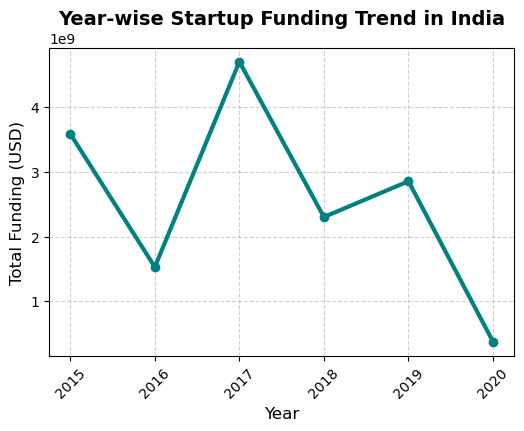

In [93]:
plt.figure(figsize=(6, 4))
plt.plot(yearly_funding.index, yearly_funding.values, color='teal', linewidth=3,
         linestyle='-', marker='o', markersize=6)
plt.title("Year-wise Startup Funding Trend in India", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Funding (USD)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

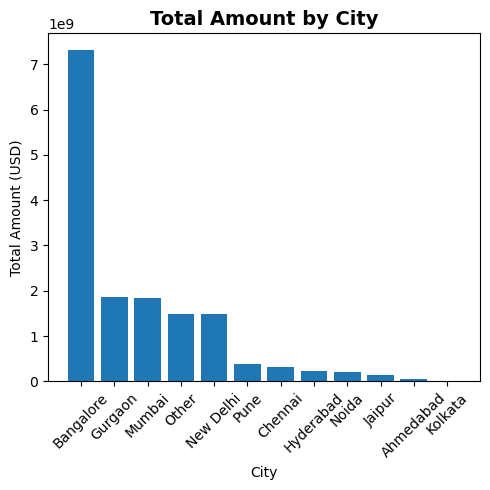

In [94]:
city_vs_total = df.groupby('city_location')['amount_in_usd'].sum().sort_values(ascending=False)
plt.figure(figsize=(5, 5))
plt.bar(city_vs_total.index, city_vs_total.values)
plt.xlabel("City")
plt.ylabel("Total Amount (USD)")
plt.title("Total Amount by City", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

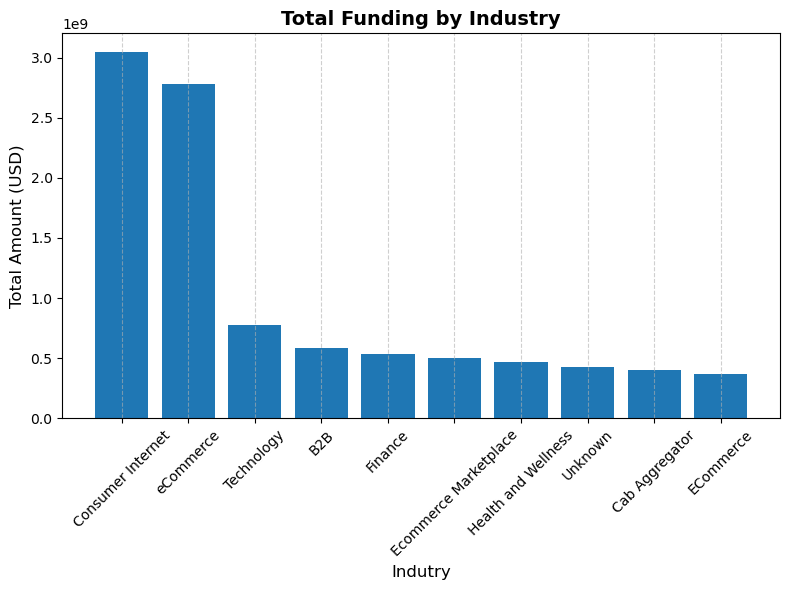

In [66]:
industry_vs_funding = df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
plt.bar(industry_vs_funding.index, industry_vs_funding.values)
plt.xlabel("Indutry", fontsize=12)
plt.ylabel("Total Amount (USD)", fontsize=12)
plt.title("Total Funding by Industry", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

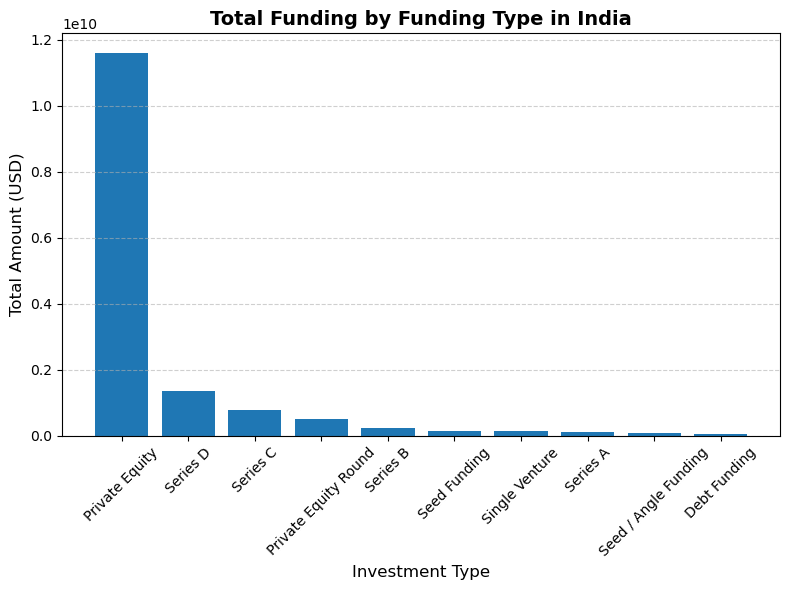

In [67]:
investmentntype_vs_funding = df.groupby('investmentntype')['amount_in_usd'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
plt.bar(investmentntype_vs_funding.index, investmentntype_vs_funding.values)
plt.xlabel("Investment Type", fontsize=12)
plt.ylabel("Total Amount (USD)", fontsize=12)
plt.title("Total Funding by Funding Type in India", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [68]:
print("Min :", df['amount_in_usd'].min())
print("Max :", df['amount_in_usd'].max())
print("Mean :", df['amount_in_usd'].mean())
print("Median :", df['amount_in_usd'].median())

if df['amount_in_usd'].mean() > df['amount_in_usd'].median():
    print("mean > meadian  is True")

Min : 16600.0
Max : 2500000000.0
Mean : 17301107.043089066
Median : 2000000.0
mean > meadian  is True


## Distribution of Startup Funding

This visualization shows how funding amounts are distributed 
across startups.


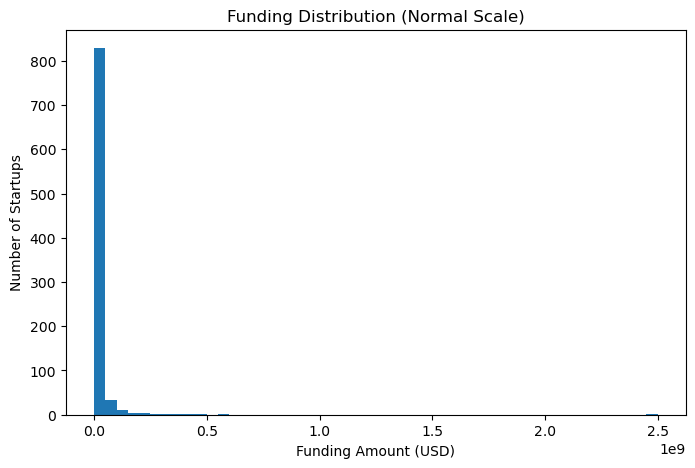

In [69]:
plt.figure(figsize=(8,5))
plt.hist(df['amount_in_usd'], bins=50)
plt.xlabel("Funding Amount (USD)")
plt.ylabel("Number of Startups")
plt.title("Funding Distribution (Normal Scale)")
plt.show()


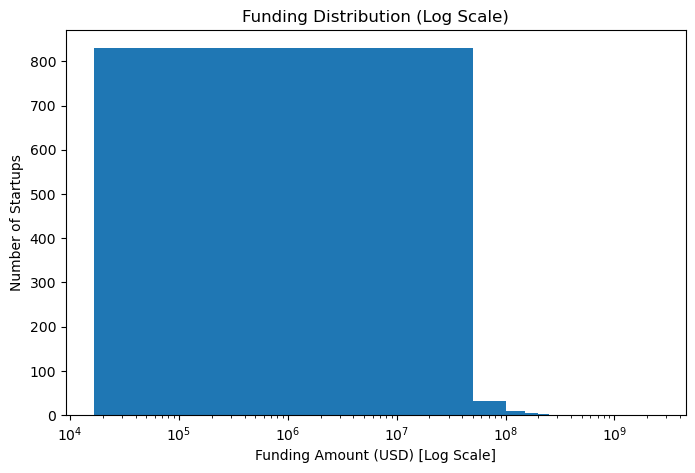

In [70]:
plt.figure(figsize=(8,5))
plt.hist(df['amount_in_usd'], bins=50)
plt.xscale('log')
plt.xlabel("Funding Amount (USD) [Log Scale]")
plt.ylabel("Number of Startups")
plt.title("Funding Distribution (Log Scale)")
plt.show()


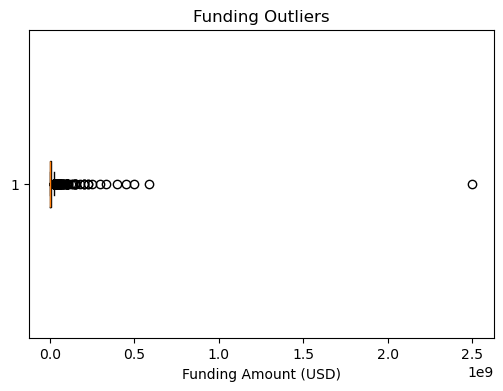

In [71]:
plt.figure(figsize=(6,4))
a = df['amount_in_usd']
plt.boxplot(a, vert=False)
plt.xlabel("Funding Amount (USD)")
plt.title("Funding Outliers")
plt.show()


In [72]:
df.columns

Index(['sr_no', 'date', 'startup_name', 'industry_vertical', 'city_location',
       'investors_name', 'investmentntype', 'amount_in_usd', 'year', 'month'],
      dtype='object')

# Model Preparation

In this step, the cleaned data is prepared for machine learning by:
- Selecting features
- Encoding categorical variables
- Splitting data into input and output


In [73]:
investment_count = df['investmentntype'].value_counts()
investment_amount = df.groupby('investmentntype')['amount_in_usd'].sum()

comparison = pd.DataFrame({
    'Count': investment_count,
    'Total_Funding': investment_amount
}).sort_values(by='Total_Funding', ascending=False)

comparison.head(10)

,Count,Total_Funding
investmentntype,,
Private Equity,443,1.161137e+10
Series D,10,1.360799e+09
Series C,8,7.810800e+08
Private Equity Round,4,5.060000e+08
Series B,9,2.285184e+08
Seed Funding,297,1.453482e+08
Single Venture,1,1.400000e+08
Series A,15,1.097000e+08
Seed / Angle Funding,1,1.000000e+08


In [74]:
top_industries = df.groupby('industry_vertical')['amount_in_usd'].sum().sort_values(ascending=False).head(5).index

industry_trend = df[df['industry_vertical'].isin(top_industries)]
industry_pivot = industry_trend.pivot_table(
    index='year',
    columns='industry_vertical',
    values='amount_in_usd',
    aggfunc='sum'
)

industry_pivot


industry_vertical,B2B,Consumer Internet,Finance,Technology,eCommerce
year,,,,,
2015,NaN,NaN,NaN,NaN,1.000000e+07
2016,NaN,7.625120e+08,16000000.0,362773000.0,1.469700e+08
2017,NaN,1.338063e+09,3570000.0,297409000.0,2.624834e+09
2018,2000000.0,9.487410e+08,265250000.0,107372600.0,NaN
2019,585000000.0,NaN,253000000.0,6000000.0,NaN


In [75]:
top_cities = df.groupby('city_location')['amount_in_usd'].sum().sort_values(ascending=False).head().index
year_city = df[df['city_location'].isin(top_cities)]
pivot = year_city.pivot_table(
    index='year',
    columns='city_location',
    values='amount_in_usd',
    aggfunc='sum',
)
pivot

city_location,Bangalore,Gurgaon,Mumbai,New Delhi,Other
year,,,,,
2015,9.415150e+08,4.279450e+08,518465000.0,992482000.0,4.835934e+08
2016,2.800225e+08,4.728075e+08,330184500.0,225303000.0,5.401500e+06
2017,3.556578e+09,3.959060e+08,376166000.0,76171000.0,1.825000e+06
2018,1.107684e+09,3.026241e+08,405325000.0,76886140.0,8.718060e+07
2019,1.212315e+09,1.140900e+08,200964315.0,116645000.0,9.142033e+08
2020,2.183589e+08,1.500000e+08,1800000.0,3000000.0,NaN


In [76]:
bins = [0,1e6,10e6,100e6,df['amount_in_usd'].max()]
labels = ['<1M','1M-10M','10M-100M','>100M']

df['funding_bucket'] = pd.cut(df['amount_in_usd'],bins=bins,labels=labels)

df['funding_bucket'].value_counts()

funding_bucket
<1M         390
1M-10M      300
10M-100M    172
>100M        25
Name: count, dtype: int64

In [77]:
df['funding_age'] = df['year'].apply(lambda x: 'Recent' if x >= 2018 else 'Old')

df['funding_age'].value_counts()

funding_age
Old       701
Recent    186
Name: count, dtype: int64

In [78]:
df['high_value_funding'] = df['amount_in_usd'].apply(lambda x: 1 if x >= 10000000 else 0)

In [79]:
df['top_city_flag'] = df['city_location'].apply(lambda x: 1 if x in top_cities else 0)

In [80]:
df.isnull().sum()

sr_no                  0
date                   0
startup_name           0
industry_vertical      0
city_location          0
investors_name        11
investmentntype        2
amount_in_usd          0
year                   0
month                  0
funding_bucket         0
funding_age            0
high_value_funding     0
top_city_flag          0
dtype: int64

In [81]:
df.drop(columns=['investors_name'], inplace=True)

In [82]:
df['investmentntype'] = df['investmentntype'].fillna(df['investmentntype'].mode()[0])

In [83]:
df.isnull().sum()

sr_no                 0
date                  0
startup_name          0
industry_vertical     0
city_location         0
investmentntype       0
amount_in_usd         0
year                  0
month                 0
funding_bucket        0
funding_age           0
high_value_funding    0
top_city_flag         0
dtype: int64

In [84]:
x = df[['year','top_city_flag']]
y = df['high_value_funding']

In [85]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x,y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [86]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)

y_pred_log = log_model.predict(x_test)

## Startup Funding Prediction

This model predicts whether a startup will receive 
high value funding or low value funding based on input features.


In [87]:
from sklearn.metrics import classification_report,confusion_matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

Confusion Matrix:
[[166   0]
 [ 56   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       166
           1       0.00      0.00      0.00        56

    accuracy                           0.75       222
   macro avg       0.37      0.50      0.43       222
weighted avg       0.56      0.75      0.64       222



E:\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\jupyter\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [88]:
log_model_bal = LogisticRegression(class_weight='balanced')
log_model_bal.fit(x_train, y_train)

y_pred_bal = log_model_bal.predict(x_test)

print(confusion_matrix(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

[[ 21 145]
 [  8  48]]
              precision    recall  f1-score   support

           0       0.72      0.13      0.22       166
           1       0.25      0.86      0.39        56

    accuracy                           0.31       222
   macro avg       0.49      0.49      0.30       222
weighted avg       0.60      0.31      0.26       222



In [89]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=6,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


[[93 73]
 [23 33]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       166
           1       0.31      0.59      0.41        56

    accuracy                           0.57       222
   macro avg       0.56      0.57      0.53       222
weighted avg       0.68      0.57      0.60       222



In [90]:
rf_model_tuned = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42
)
rf_model_tuned.fit(x_train,y_train)
y_pred_tuned = rf_model_tuned.predict(x_test)

print(confusion_matrix(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

[[93 73]
 [23 33]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66       166
           1       0.31      0.59      0.41        56

    accuracy                           0.57       222
   macro avg       0.56      0.57      0.53       222
weighted avg       0.68      0.57      0.60       222



In [91]:
import joblib
joblib.dump(rf_model_tuned, "../CSV_File/startup_funding_model.pkl")


['../CSV_File/startup_funding_model.pkl']

## Conclusion

This project successfully demonstrates:
- Data cleaning and preprocessing
- Exploratory data analysis
- Visualization of startup funding trends
- Basic prediction logic

The insights obtained can help understand funding behavior 
in the Indian startup ecosystem.
